

# Project: TMDB Movie Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

the TMDB 5000 Movie Dataset contain many useful information about movies authors , movies votes , movies runtime , movies budgets and so many wonderful data knowledge that i believe it's will help me to find my answers of questions and they are:

which movie title had the highest vote count ?

is there any impact of vote count on revenue?

which movie title had the longest run time?

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

Here I'm going to load the data and clean up the data set to get accurate results

### General Properties

In [3]:
#load and read the dataset
df = pd.read_csv('tmdb-movies.csv')
#see the 10 head to understand the dataset
df.head(10)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [4]:
#see how many row and column in the dataset
df.shape

(10866, 21)

In [5]:
#see the dataset statistical
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#drop the data that don't need
df.drop(['budget','overview','cast','keywords','production_companies','genres','tagline','director','release_date','budget_adj','homepage','release_year',], axis=1 , inplace=True )

In [7]:
# see the data after drop
df.head(10)

,id,imdb_id,popularity,revenue,original_title,runtime,vote_count,vote_average,revenue_adj
0,135397,tt0369610,32.985763,1513528810,Jurassic World,124,5562,6.5,1.392446e+09
1,76341,tt1392190,28.419936,378436354,Mad Max: Fury Road,120,6185,7.1,3.481613e+08
2,262500,tt2908446,13.112507,295238201,Insurgent,119,2480,6.3,2.716190e+08
3,140607,tt2488496,11.173104,2068178225,Star Wars: The Force Awakens,136,5292,7.5,1.902723e+09
4,168259,tt2820852,9.335014,1506249360,Furious 7,137,2947,7.3,1.385749e+09
5,281957,tt1663202,9.110700,532950503,The Revenant,156,3929,7.2,4.903142e+08
6,87101,tt1340138,8.654359,440603537,Terminator Genisys,125,2598,5.8,4.053551e+08
7,286217,tt3659388,7.667400,595380321,The Martian,141,4572,7.6,5.477497e+08
8,211672,tt2293640,7.404165,1156730962,Minions,91,2893,6.5,1.064192e+09
9,150540,tt2096673,6.326804,853708609,Inside Out,94,3935,8.0,7.854116e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  int64  
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   revenue_adj     10866 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 764.1+ KB


In [9]:
#check if there any null values
df.isnull().values.any()  

True

In [10]:
#drop the na and show the data info
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10856 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10856 non-null  float64
 3   revenue         10856 non-null  int64  
 4   original_title  10856 non-null  object 
 5   runtime         10856 non-null  int64  
 6   vote_count      10856 non-null  int64  
 7   vote_average    10856 non-null  float64
 8   revenue_adj     10856 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 848.1+ KB


In [11]:
#check if there any duplicate
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10856, dtype: bool

In [29]:
#total duplicate
sum(df.duplicated())

1

In [12]:
#drop duplicate
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

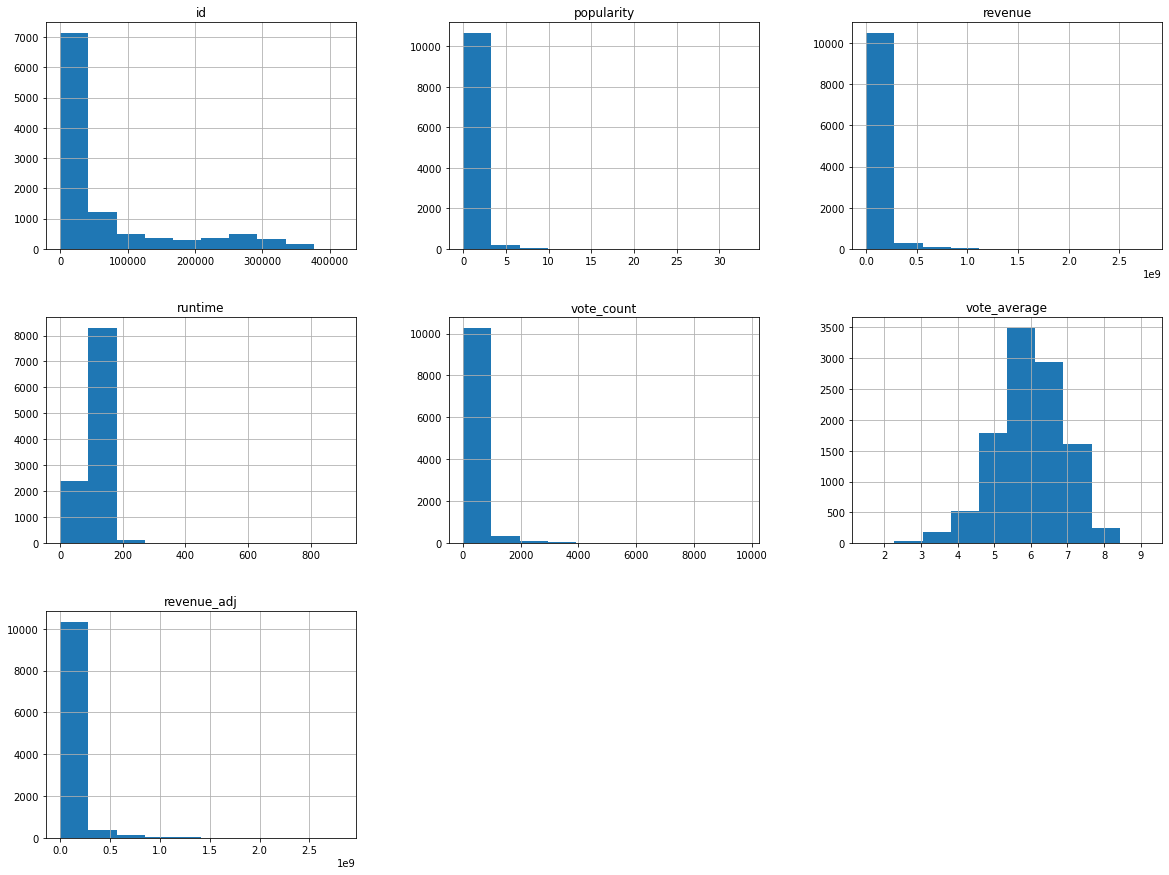

In [13]:
#data visualization
df.hist(figsize=(20,15))

Now we have clean dataset and clear understanding our dataset after dropping the data that will not help me to find my answers and drop the null values.

### Data Cleaning 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned our data, we're ready to move on to exploration. to Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. 

### Research Question 1 (is there any impact of vote count on revenue?)

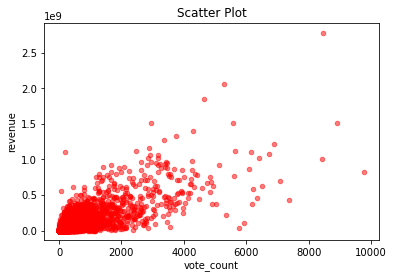

In [19]:
# Scatter Plot to see if there any impact of vote count on revenue
df.plot(kind='scatter', x='vote_count', y='revenue', alpha=.5, color='r')
plt.xlabel('vote_count')
plt.ylabel('revenue')
plt.title('Scatter Plot')
plt.show()

as we can see in the scatter plot that there is no relation between the vote count and the revenue and that lead us to know that there no impact on the vote count from the revenue.

### Research Question 2  (which movie title had the highest vote count ?)

In [15]:
#
highest_movieVote = df.sort_values('vote_count', ascending = False)
high = highest_movieVote.loc[:,['original_title', 'vote_count']]
high.head(10)


,original_title,vote_count
1919,Inception,9767
4361,The Avengers,8903
1386,Avatar,8458
2875,The Dark Knight,8432
4364,Django Unchained,7375
4382,The Hunger Games,7080
5425,Iron Man 3,6882
4363,The Dark Knight Rises,6723
629,Interstellar,6498
4367,The Hobbit: An Unexpected Journey,6417


### Research Question 3  (which movie title had the longest run time?)

<AxesSubplot:xlabel='runtime'>

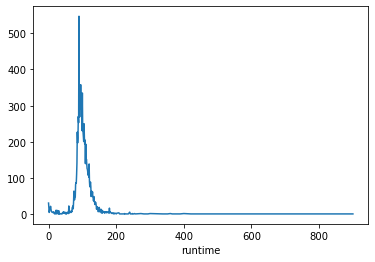

In [16]:
#i want to see the movies and there avarge runtime
df_runtime = df.groupby(['runtime'])['original_title'].count()
df_runtime.plot()

more then 600 movie had 100 runtime.

In [45]:
longest_movieRuntime = df.sort_values('runtime', ascending = False)
longest = longest_movieRuntime.loc[:,['original_title', 'runtime']]
longest.head(10)

,original_title,runtime
3894,The Story of Film: An Odyssey,900
4041,Taken,877
2722,Band of Brothers,705
6176,Shoah,566
6181,"North and South, Book I",561
6894,Planet Earth,550
2214,The Pacific,540
3356,John Adams,501
1865,Life,500
3141,Generation Kill,470


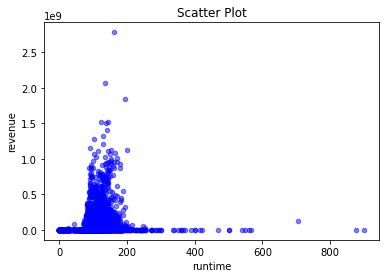

In [17]:
# Scatter Plot
df.plot(kind='scatter', x='runtime', y='revenue', alpha=.5, color='b')
plt.xlabel('runtime')
plt.ylabel('revenue')
plt.title('Scatter Plot')
plt.show()

i was want to know if the revenue has impact on the runtime but it's turn out that there is no relation between them .

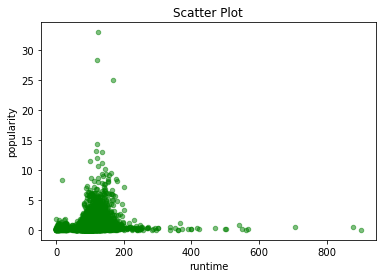

In [21]:
# Scatter Plot
df.plot(kind='scatter', x='runtime', y='popularity', alpha=.5, color='g')
plt.xlabel('runtime')
plt.ylabel('popularity')
plt.title('Scatter Plot')
plt.show()

i was want to know if the popularity has impact on the runtime but also it's turn out that there is no relation between them .

<a id='conclusions'></a>
## Summary
-there is no impact of vote counts at all on revenue
-the movie title has the highest vote count is an" inception" movie 
-The story of film:an odyssey  movie had the longest run time
-more then 600 movie had 100 runtime
-there is no relation between runtime and revenue so that mean the movie  revenue not impact the movie Duration.
-there is no relation between runtime and popularity so that mean the movie  popularity not impact the movie Duration. 

## Limitations
there are many outlier in the dataset and i could not delete them because it may affect on my results . 

## References
the data analysis its new interesting subject for me so i was need to search about many thing to help me understand the concept very will .

https://static1.squarespace.com/static/55bfa8e4e4b007976149574e/t/5b998f398a922d8eaecaefd2/1536790332004/investigate-dataset-movies.pdf

https://www.kaggle.com/saviola07/analysis-of-tmdb-5000-movie-dataset-for-beginners#1.-INTRODUCTION-TO-PYTHON

